In [16]:
from sqlalchemy import create_engine
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
DB_PARAMS = {
    "dbname": os.getenv("POSTGRES_DB"),
    "user": os.getenv("POSTGRES_USER"),
    "password": os.getenv("POSTGRES_PASSWORD"), 
    "host": "postgres",
    "port":  5432
}

In [13]:
try:
    db_url = f"postgresql+psycopg2://{DB_PARAMS['user']}:{DB_PARAMS['password']}@{DB_PARAMS['host']}/{DB_PARAMS['dbname']}"
    engine = create_engine(db_url)

    query = """
        SELECT user_id, COUNT(*) AS purchases
        FROM customers
        WHERE event_type = 'purchase'
        GROUP BY user_id
    """
    df = pd.read_sql(query, engine)

except Exception as e:
    print(f"❌ An error occurred: {e}")

In [14]:
X = df[['purchases']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

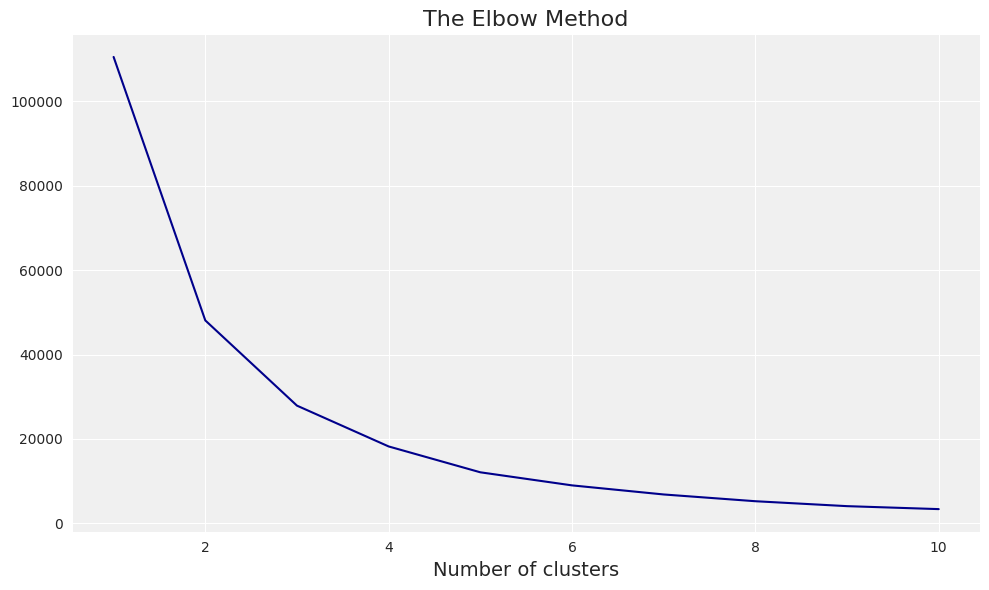

In [17]:
sns.set_style("darkgrid", rc={"axes.facecolor": "#f0f0f0", "grid.color": "white"})
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, linestyle='-', color='darkblue')
plt.title('The Elbow Method', fontsize=16)
plt.xlabel('Number of clusters', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()